In [67]:
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objs as go

In [68]:
#read file 
full_data=pd.read_csv(r"zomato.csv")
full_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [69]:
full_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [70]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [71]:
full_data.shape

(51717, 17)

In [72]:
full_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [73]:
null_feature=[f for f in full_data.columns if full_data[f"{f}"].isnull().sum()>0]
null_feature

['rate',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)']

In [74]:
#percentage of null value 
for f in null_feature:
    f_=full_data[str(f)].isnull().sum()/len(full_data['rate'])*100
    print(f" the percentage of {f} null:\t{f_.round(2)}")

 the percentage of rate null:	15.03
 the percentage of phone null:	2.34
 the percentage of location null:	0.04
 the percentage of rest_type null:	0.44
 the percentage of dish_liked null:	54.29
 the percentage of cuisines null:	0.09
 the percentage of approx_cost(for two people) null:	0.67


In [75]:
full_data.dropna(axis="index",subset=["rate"],inplace=True)
full_data.shape

(43942, 17)

In [76]:
full_data["rate"].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [77]:
def splitrate(x):
    return x.split("/")[0]

In [78]:
full_data["rate"]=full_data["rate"].apply(splitrate)
full_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
# full_data[full_data["rate"]=='NEW']=full_data[full_data["rate"]!='NEW'].mean()
full_data

full_data

In [ ]:
toprated=full_data.groupby("name")["rate"].count().sort_values(ascending=False).to_frame()

In [ ]:
toprated=toprated[0:10]

In [ ]:
plt.figure(figsize=(15,5))
fig=px.bar(data_frame=toprated,x=toprated.index,y="rate")
fig.show()

## Big Rated Values in Restaurants

In [79]:
full_data["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [80]:
full_data.replace(["NEW",'-'],0,inplace=True)
full_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [81]:
full_data["rate"]=full_data["rate"].astype(float)
full_data["rate"].astype

<bound method NDFrame.astype of 0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51709    3.7
51711    2.5
51712    3.6
51715    4.3
51716    3.4
Name: rate, Length: 43942, dtype: float64>

In [82]:
full_data["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

In [83]:
best_rest=full_data.groupby("name")["rate"].mean().round(2).sort_values(ascending=False).to_frame()
best_rest.reset_index(inplace=True)
best_rest.replace("SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine","Spa Cuisine",inplace=True)
best_rest

,name,rate
0,Spa Cuisine,4.90
1,Byg Brewski Brewing Company,4.90
2,Asia Kitchen By Mainland China,4.90
3,Punjab Grill,4.87
4,Belgian Waffle Factory,4.84
...,...,...
7157,Nawabi Kitchen,0.00
7158,The Dessert Destination,0.00
7159,Ruchi's Foodies Blast,0.00
7160,Chef Genie,0.00


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29824\3345118027.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='rate', ylabel='Density'>

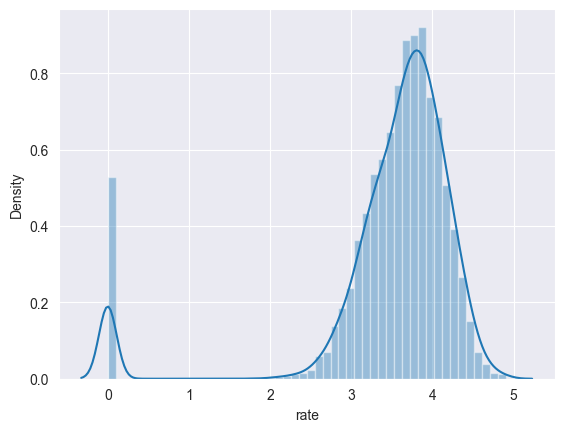

In [84]:
sns.distplot(full_data["rate"])

In [85]:
# Best restaurant
plt.figure(figsize=(15,15))
best_rest=best_rest[:10]
px.bar(data_frame=best_rest,x="name",y="rate",orientation='v',color="rate").show()

<Figure size 1500x1500 with 0 Axes>

In [86]:
unbest_rest=full_data.groupby("name")["rate"].mean().round(2).sort_values(ascending=True).to_frame()
unbest_rest.reset_index(inplace=True)
unbest_rest.replace("SantÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Spa Cuisine","Spa Cuisine",inplace=True)
unbest_rest.head()


,name,rate
0,Punjabi Paratha House,0.0
1,Canopus Multicuisine Restaurant,0.0
2,Me N U,0.0
3,Mayura Grand Pure Veg Restaurant,0.0
4,Mayur Veg Restaurant,0.0


In [87]:
# Not rated restaurant
unbest_rest_zero=unbest_rest[unbest_rest["rate"]==0]
unbest_rest_zero["rate"].count()

513

In [88]:
# Unbest restaurant
plt.figure(figsize=(15,15))
unbest_rest=unbest_rest[unbest_rest["rate"]>=1.0]
unbest_rest=unbest_rest[:10]
unbest_rest
px.bar(data_frame=unbest_rest,x="name",y="rate",orientation='v',color="rate").show()

<Figure size 1500x1500 with 0 Axes>

In [89]:
# full_data["approx_cost(for two people)"].astype(float)
full_data["approx_cost(for two people)"].isnull().sum()

252

Most Expensive and Cheaper in Resturents

In [90]:
full_data["approx_cost(for two people)"].astype

<bound method NDFrame.astype of 0          800
1          800
2          800
3          300
4          600
         ...  
51709      800
51711      800
51712    1,500
51715    2,500
51716    1,500
Name: approx_cost(for two people), Length: 43942, dtype: object>

# Best-prices

Convert String to Float

In [91]:
full_data["approx_cost(for two people)"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '1,700', '1,400', '1,350', nan, '2,200',
       '2,000', '1,800', '1,900', '180', '330', '2,500', '2,100', '3,000',
       '2,800', '3,400', '50', '40', '1,250', '3,500', '4,000', '2,400',
       '2,600', '1,450', '70', '3,200', '560', '240', '360', '6,000',
       '1,050', '2,300', '4,100', '120', '5,000', '3,700', '1,650',
       '2,700', '4,500'], dtype=object)

In [92]:
def convertor(x):
   if len(str(x))>3 or x=="nan":
        try:
            l=x.split(",")
            return float(l[0]+l[1])
        except:
             pass
   else:
        return float(str(x))
    

In [93]:
full_data["approx_cost(for two people)"]=full_data["approx_cost(for two people)"].apply(convertor)

In [94]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43942 non-null  object 
 1   address                      43942 non-null  object 
 2   name                         43942 non-null  object 
 3   online_order                 43942 non-null  object 
 4   book_table                   43942 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        43942 non-null  int64  
 7   phone                        43110 non-null  object 
 8   location                     43942 non-null  object 
 9   rest_type                    43791 non-null  object 
 10  dish_liked                   23609 non-null  object 
 11  cuisines                     43931 non-null  object 
 12  approx_cost(for two people)  43690 non-null  float64
 13  reviews_list         

In [95]:
full_data["approx_cost(for two people)"].min()

40.0

C:\Users\ASUS\AppData\Local\Temp\ipykernel_29824\1098711224.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='approx_cost(for two people)', ylabel='Density'>

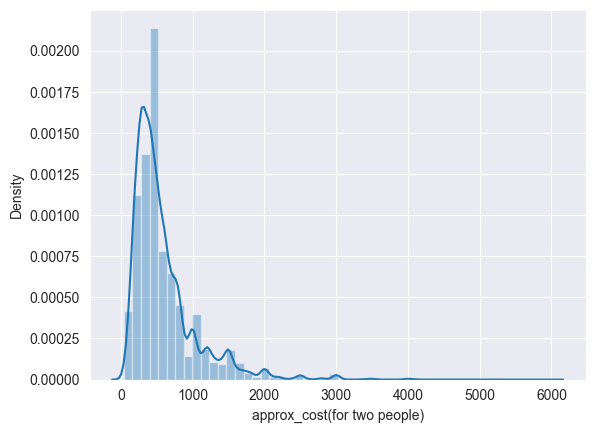

In [96]:
sns.distplot(full_data["approx_cost(for two people)"])

In [97]:
#Most Expensive Restaurant
most_expen=full_data.groupby("name")["approx_cost(for two people)"].count().sort_values(ascending=False).to_frame()
most_expen.rename(columns={"name":"name","approx_cost(for two people)":"count of Order"},inplace=True)
most_expen["sum of all orders"]=full_data.groupby("name")["approx_cost(for two people)"].sum().sort_values(ascending=False).to_frame()
most_expen=most_expen[:10]
most_expen.reset_index(inplace=True)


In [98]:
most_expen_rescling=most_expen.copy()

In [99]:
most_expen_rescling.drop(columns=["name"],inplace=True)

In [100]:
#Rescaling o plot
most_expen_rescling=(most_expen_rescling-most_expen_rescling.mean())/most_expen_rescling.std()
# most_expen_rescling.drop(columns=["name"],inplace=True)
most_expen_rescling

,count of Order,sum of all orders
0,1.990231,2.024569
1,1.573429,0.737755
2,0.114621,0.610696
3,-0.197981,-0.549059
4,-0.197981,-1.065406
5,-0.197981,-0.549059
6,-0.614783,0.286289
7,-0.718984,-1.162728
8,-0.823185,0.448493
9,-0.927385,-0.781550


In [101]:
most_expen

,name,count of Order,sum of all orders
0,Cafe Coffee Day,89,74800.0
1,Onesta,85,51000.0
2,Empire Restaurant,71,48650.0
3,Kanti Sweets,68,27200.0
4,Five Star Chicken,68,17650.0
5,Just Bake,68,27200.0
6,Petoo,64,42650.0
7,Baskin Robbins,63,15850.0
8,Pizza Hut,62,45650.0
9,Polar Bear,61,22900.0


In [102]:
px.line(data_frame=most_expen[:10],x="name",y="sum of all orders",).show()
most_expen=most_expen[:10]

In [103]:
px.line(data_frame=most_expen[:10],x="name",y="count of Order",).show()

In [104]:
#TODO multil plot in plotlt
fig = go.Figure()

fig.add_trace(go.Line(
    x=most_expen["name"],
    y=most_expen_rescling["sum of all orders"],
    name="sum of all orders"       # this sets its legend entry
))


fig.add_trace(go.Line(
     x=most_expen["name"],
    y=most_expen_rescling["count of Order"],
    name="count of oreder"
))

fig.update_layout(
    title="count of oreder  and sum of all orders for top names",
    xaxis_title="names of restautaurant",
    yaxis_title="count of oreder  and sum of all orders ",
    legend_title=("Count Sum Order vs Orders"),
    font=dict(
        family="Courier New, monospace",
        size=10,
        color="RebeccaPurple"
    )
)

fig.show()

D:\Freelance Work\Food Jupyter\food\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




## Online order

In [105]:
full_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [106]:
values=full_data["online_order"].value_counts()

In [107]:
full_data["online_order"].isnull().sum()

0

In [108]:
import plotly.offline as iplot
labels=["yes","No"]
trace=go.Pie(values=values,title="order online or not",labels=labels,hole=.4,textinfo='label+percent')
iplot.iplot([trace])

In [109]:
labels=["Yes","No"]
px.pie(values=values,title="Order Online or Not",names=labels,).show()

In [110]:
#Book Analysis
values_=full_data["book_table"].value_counts()

In [111]:
full_data["book_table"].isnull().sum()

0

In [112]:
trace=go.Pie(values=values_,labels=["Not book","book"],title="book table or not" ,textinfo='label+percent',insidetextorientation='radial',hole=.4)
# pie.title.position(20)

iplot.iplot([trace])

In [113]:
from plotly.subplots import make_subplots

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}],]
fig = make_subplots(rows=1, cols=2, specs=specs)

# Define pie charts
fig.add_trace(go.Pie(labels=["Order","Not Order"], values=values, name='Order or Not',hole=.3,title="order online or not")
                      ,1, 1)
fig.add_trace(go.Pie(labels=["Not Book","Book"], values=values_, name='Book or Not',hole=.3,title="book or not"),1, 2)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='label+percent')
fig.update(layout_title_text='Order online  and book or not order or book',
           layout_showlegend=False)

fig = go.Figure(fig)
iplot.iplot(fig)

In [114]:
full_data

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51709,https://www.zomato.com/bangalore/the-farm-hous...,"136, SAP Labs India, KIADB Export Promotion In...",The Farm House Bar n Grill,No,No,3.7,34,+91 9980121279\n+91 9900240646,Whitefield,"Casual Dining, Bar",NaN,"North Indian, Continental",800.0,"[('Rated 4.0', 'RATED\n Ambience- Big and spa...",[],Pubs and bars,Whitefield
51711,https://www.zomato.com/bangalore/bhagini-2-whi...,"139/C1, Next To GR Tech Park, Pattandur Agraha...",Bhagini,No,No,2.5,81,080 65951222,Whitefield,"Casual Dining, Bar","Biryani, Andhra Meal","Andhra, South Indian, Chinese, North Indian",800.0,"[('Rated 4.0', 'RATED\n A fine place to chill...",[],Pubs and bars,Whitefield
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6,27,080 40301477,Whitefield,Bar,NaN,Continental,1500.0,"[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,2500.0,"[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [115]:
full_data["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51709                                                  NaN
51711                                 Biryani, Andhra Meal
51712                                                  NaN
51715                         Cocktails, Pizza, Buttermilk
51716                                                  NaN
Name: dish_liked, Length: 43942, dtype: object

In [116]:
dish_liked=full_data["dish_liked"].value_counts().to_frame()

In [ ]:
dish_liked.reset_index(inplace=True)
# dish_liked.sort_values(by="count",ascending=False)

In [117]:
dish_liked.head(3)

,count
dish_liked,
Biryani,182
Chicken Biryani,73
Friendly Staff,69


In [118]:
dish_liked.rename(columns={"index":"dish","dish_liked":"count"},inplace=True)
# dish_liked.reset_index(inplace=True)
# dish_liked.drop(columns=["index","index"])
dish_liked.head(10)

,count
dish_liked,
Biryani,182
Chicken Biryani,73
Friendly Staff,69
Waffles,68
Paratha,57
Masala Dosa,56
Rooftop Ambience,42
Coffee,42
Pizza,38


In [123]:
dish_liked.reset_index(inplace=True)

In [124]:
dish_liked.head(3)

,dish_liked,count
0,Biryani,182
1,Chicken Biryani,73
2,Friendly Staff,69


In [125]:
dish_liked.columns

Index(['dish_liked', 'count'], dtype='object')

In [126]:
dish_liked=dish_liked[:11]

In [127]:
px.bar(data_frame=dish_liked[:11],x="dish_liked",y="count").show()
# iplot.iplot(trace2)

In [128]:
full_data["votes"].max()

16832

In [129]:
rest_type=full_data["rest_type"]

In [ ]:
# rest_type=rest_type.value_counts().to_frame().reset_index(inplace=True)

In [130]:
rest_type=rest_type.value_counts().to_frame()

In [131]:
# rest_type.sort_values(ascending=False)
rest_type.reset_index(inplace=True)
rest_type

,rest_type,count
0,Quick Bites,15073
1,Casual Dining,9923
2,Cafe,3527
3,Dessert Parlor,1939
4,Delivery,1791
...,...,...
82,"Bakery, Food Court",2
83,"Food Court, Beverage Shop",2
84,"Dessert Parlor, Food Court",2
85,"Dessert Parlor, Kiosk",2


In [ ]:
#rest_type.rename(columns={"index":"rest_type","rest_type":"count"},inplace=True)

In [133]:
rest_type=rest_type[:10]

In [134]:
px.bar(data_frame=rest_type[:10],x="rest_type",y="count").show()

## Most voted Restaurant

In [135]:
top_voted=full_data.groupby("name")["votes"].sum().to_frame()
# top_voted.sort_values(ascending=False,inplace=True)
top_voted

,votes
name,
#FeelTheROLL,14
#L-81 Cafe,432
#refuel,111
1000 B.C,294
100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,123
...,...
i-Bar - The Park Bangalore,6817
iFruit Live Ice Creams,40
iSpice Resto Cafe,211


In [136]:
top_voted.reset_index(inplace=True)

In [137]:
top_voted.sort_values(by="votes",ascending=False,inplace=True)

In [138]:
top_voted

,name,votes
4540,Onesta,347520
6742,Truffles,301059
2028,Empire Restaurant,229808
2537,Hammered,180602
6289,The Black Pearl,172122
...,...,...
3461,Ksheera Sagar,0
3458,Kshathriya's Naati Junction,0
3447,Krishna Leela Grand,0
3423,Kombo King,0


In [139]:
#top voted restaurant is
top_voted=top_voted[:11]
px.bar(data_frame=top_voted,x="name",y="votes").show()

In [140]:
full_data.groupby("location").sum()

,url,address,name,online_order,book_table,rate,votes,phone,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
location,,,,,,,,,,,,,,,,
BTM,https://www.zomato.com/bangalore/sankranthi-ve...,"986, 1st Block, Vijaya Bank Layout, 4th Stage,...",Sankranthi Veg RestaurantHearts Unlock Cafeeat...,YesNoYesYesYesYesYesYesYesYesYesYesYesYesYesYe...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,14044.8,617880,+91 8095275614+91 9008143437\r\n+91 7259710298...,Casual DiningCafeDeliveryCasual DiningCasual D...,"Tea, Vada Sambar, Masala DosaHealthy Breakfast...","South Indian, North Indian, ChineseCafe, Healt...",1749000.0,"[('Rated 3.0', ""RATED\n So we ended up here o...","['Jeera Rice', 'Veg Pulao', 'Veg Hyderabadi Bi...",BuffetCafesDeliveryDeliveryDeliveryDeliveryDel...,Bannerghatta RoadBannerghatta RoadBannerghatta...
Banashankari,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",JalsaSpice ElephantSan Churro CafeAddhuri Udup...,YesYesYesNoYesYesYesYesYesYesNoYesYesYesYesNoY...,YesNoNoNoYesNoNoNoYesYesNoNoNoNoNoNoNoNoNoNoNo...,2715.5,161600,080 42297555\r\n+91 9743772233080 41714161+91 ...,"Casual DiningCasual DiningCafe, Casual DiningQ...","Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, ChineseChinese, North I...",353430.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[][][][][][][][][][][][][][][][][][][][][][][]...,BuffetBuffetBuffetBuffetCafesCafesCafesCafesCa...,BanashankariBanashankariBanashankariBanashanka...
Banaswadi,https://www.zomato.com/bangalore/cafe-nibras-b...,"13, Opposite To ITC Infotech Park, Bansawadi M...",Cafe NibrasThe SanctuaryCrunch PizzasPizza Sto...,NoNoYesYesYesYesYesYesYesYesYesYesNoYesNoNoYes...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,1678.1,35657,+91 9886546391080 41245949+91 9886059047\r\n+9...,CafeCafeQuick BitesQuick BitesQuick BitesCasua...,"Coffee, Chicken Burger, Burgers, Brownie, Carr...","Cafe, ContinentalCafe, Fast FoodItalian, Pizza...",214750.0,"[('Rated 5.0', 'RATED\n Nice place biryani is...","[][]['Cheeseless Pizza', 'Veggie Blast Pizza',...",CafesCafesDeliveryDeliveryDeliveryDeliveryDeli...,Frazer TownFrazer TownFrazer TownFrazer TownFr...
Bannerghatta Road,https://www.zomato.com/bangalore/deja-vu-resto...,"5th Floor, Gopalan Innovation Mall, Bannerghat...",Deja Vu Resto BarFattoushEmpire RestaurantAbhi...,YesYesYesYesNoYesNoYesNoYesYesYesNoYesNoNoNoYe...,YesYesNoNoNoNoYesNoNoNoNoNoNoNoNoNoNoNoNoYesNo...,4331.7,216564,+91 9632499855080 41425553\r\n+91 733783004408...,PubCasual DiningCasual DiningCasual DiningCasu...,"Gajar Ka Halwa, Chilli Chicken, Hara Bhara Keb...","North Indian, ItalianArabian, Biryani, Chinese...",617850.0,"[('Rated 5.0', ""RATED\n It's a what not resta...","[]['Barbecue Chicken', 'Pepper BBQ', 'Mandi Ch...",BuffetBuffetBuffetBuffetBuffetCafesCafesCafesC...,Bannerghatta RoadBannerghatta RoadBannerghatta...
Basavanagudi,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand VillageTimepass DinnerSrinathji's CafeRe...,NoYesNoYesYesYesYesYesYesYesYesYesYesYesYesYes...,NoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNoNo...,2184.3,94914,+91 8026612447\r\n+91 9901210005+91 9980040002...,"Casual DiningCasual DiningCasual Dining, CafeC...","Panipuri, Gol GappeOnion Rings, Pasta, Kadhai ...","North Indian, RajasthaniNorth IndianNorth Indi...",230060.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...","[][][][][][][][]['Benne Dose', 'Benne Kali Dos...",BuffetBuffetCafesCafesDeliveryDeliveryDelivery...,BanashankariBanashankariBanashankariBanashanka...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bangalore,https://www.zomato.com/bangalore/freshmenu-raj...,"75, 2nd Floor, 1st Main, Dr. Raj Kumar Road, R...",FreshMenuFit Dish FetishFreshMenuGarden City M...,YesNoYesNoNo,NoNoNoNoNo,10.1,1110,080 49653566080 30456041080 49653566+91 702266...,"DeliveryTak

In [ ]:
for x , y in full_data.groupby("location"):
    print(x,(y["name"].unique))
    break

In [141]:
nrestaurant=[]
location=[]
#here we have gruopby location return key and df of every key location key is every location and df is every df of key 
#and then we get number of every restaurant in every key by it df location   
for key ,location_df in full_data.groupby("location"):
    location.append(key)
    nrestaurant.append(len(location_df["name"].unique()))
print(nrestaurant,location)    

[581, 238, 151, 362, 195, 72, 284, 60, 110, 152, 31, 2, 55, 22, 37, 47, 83, 16, 46, 518, 147, 31, 553, 5, 54, 12, 37, 467, 13, 400, 15, 311, 76, 9, 51, 206, 136, 10, 1, 7, 133, 9, 21, 110, 252, 140, 134, 34, 70, 2, 53, 84, 16, 64, 207, 525, 9, 1, 90, 226, 7, 122, 9, 1, 43, 30, 178, 2, 16, 74, 70, 28, 41, 30, 12, 272, 46, 55, 34, 21, 34, 61, 100, 8, 34, 44, 51, 3, 634, 40, 3, 64] ['BTM', 'Banashankari', 'Banaswadi', 'Bannerghatta Road', 'Basavanagudi', 'Basaveshwara Nagar', 'Bellandur', 'Bommanahalli', 'Brigade Road', 'Brookefield', 'CV Raman Nagar', 'Central Bangalore', 'Church Street', 'City Market', 'Commercial Street', 'Cunningham Road', 'Domlur', 'East Bangalore', 'Ejipura', 'Electronic City', 'Frazer Town', 'HBR Layout', 'HSR', 'Hebbal', 'Hennur', 'Hosur Road', 'ITPL Main Road, Whitefield', 'Indiranagar', 'Infantry Road', 'JP Nagar', 'Jalahalli', 'Jayanagar', 'Jeevan Bhima Nagar', 'KR Puram', 'Kaggadasapura', 'Kalyan Nagar', 'Kammanahalli', 'Kanakapura Road', 'Kengeri', 'Koramanga

In [143]:
df_total=pd.DataFrame(zip(location,nrestaurant))
df_total.head(10)
df_loct_res_lr=df_total.copy()

In [144]:
#rename columns
df_total.columns=["location","nrestaurant"]
df_total=df_total[:11].sort_values(by="nrestaurant",ascending=False)

In [145]:
fig=go.Figure()
fig.add_trace(go.Bar(x=df_total["location"],y=df_total["nrestaurant"]))
fig.update_xaxes(title_text="location")
fig.update_yaxes(title_text="nrestaurant")
fig.show()

In [ ]:
full_data

In [146]:
#most restautrant in cuisines
top_cuisines=full_data["cuisines"].value_counts()
top_cuisines=top_cuisines.to_frame()

In [147]:
top_cuisines.reset_index(inplace=True)
top_cuisines.columns=["cuisines","count"]

In [148]:
top_cuisines.max()

cuisines    Vietnamese, Thai, Burmese, Japanese
count                                      2294
dtype: object

In [149]:
top_cuisines=top_cuisines[:11]
fig=go.Figure()
fig.add_bar(x=top_cuisines["cuisines"],y=top_cuisines["count"])
fig.update_xaxes(title_text="cuisines")
fig.update_yaxes(title_text="count")
fig.show()

In [150]:
# rate and approx cost of 2 customer
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43942 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          43942 non-null  object 
 1   address                      43942 non-null  object 
 2   name                         43942 non-null  object 
 3   online_order                 43942 non-null  object 
 4   book_table                   43942 non-null  object 
 5   rate                         43942 non-null  float64
 6   votes                        43942 non-null  int64  
 7   phone                        43110 non-null  object 
 8   location                     43942 non-null  object 
 9   rest_type                    43791 non-null  object 
 10  dish_liked                   23609 non-null  object 
 11  cuisines                     43931 non-null  object 
 12  approx_cost(for two people)  43690 non-null  float64
 13  reviews_list         

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

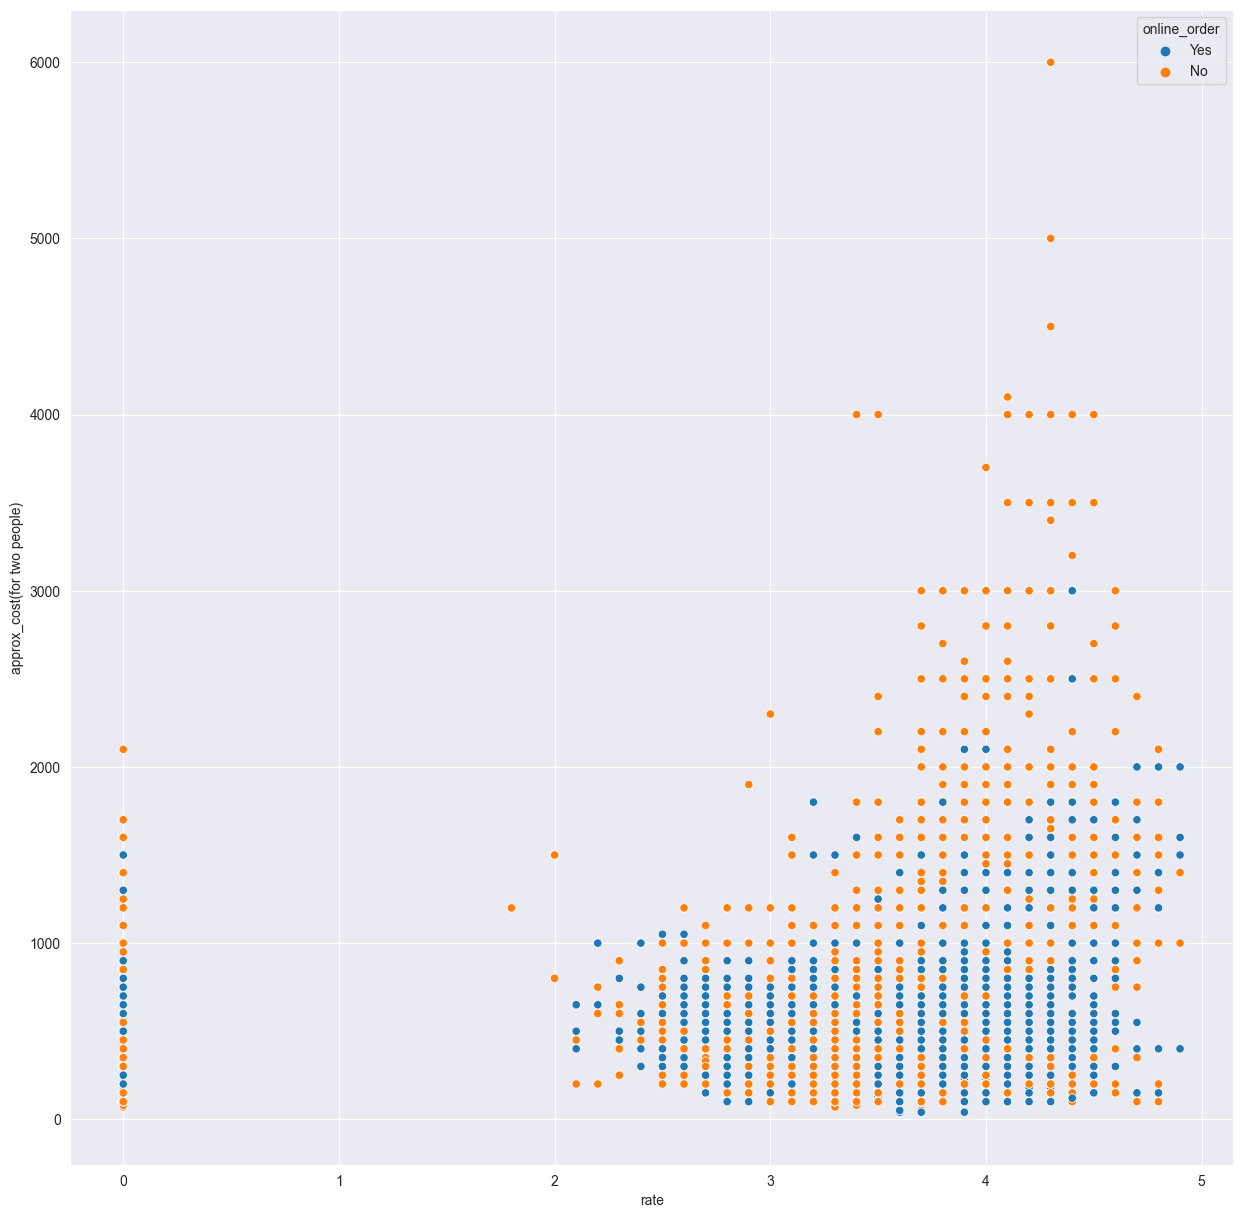

In [151]:
plt.figure(figsize=(15,15))
sns.scatterplot(y=full_data["approx_cost(for two people)"],x=full_data["rate"],hue=full_data["online_order"])
# fig.show()

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

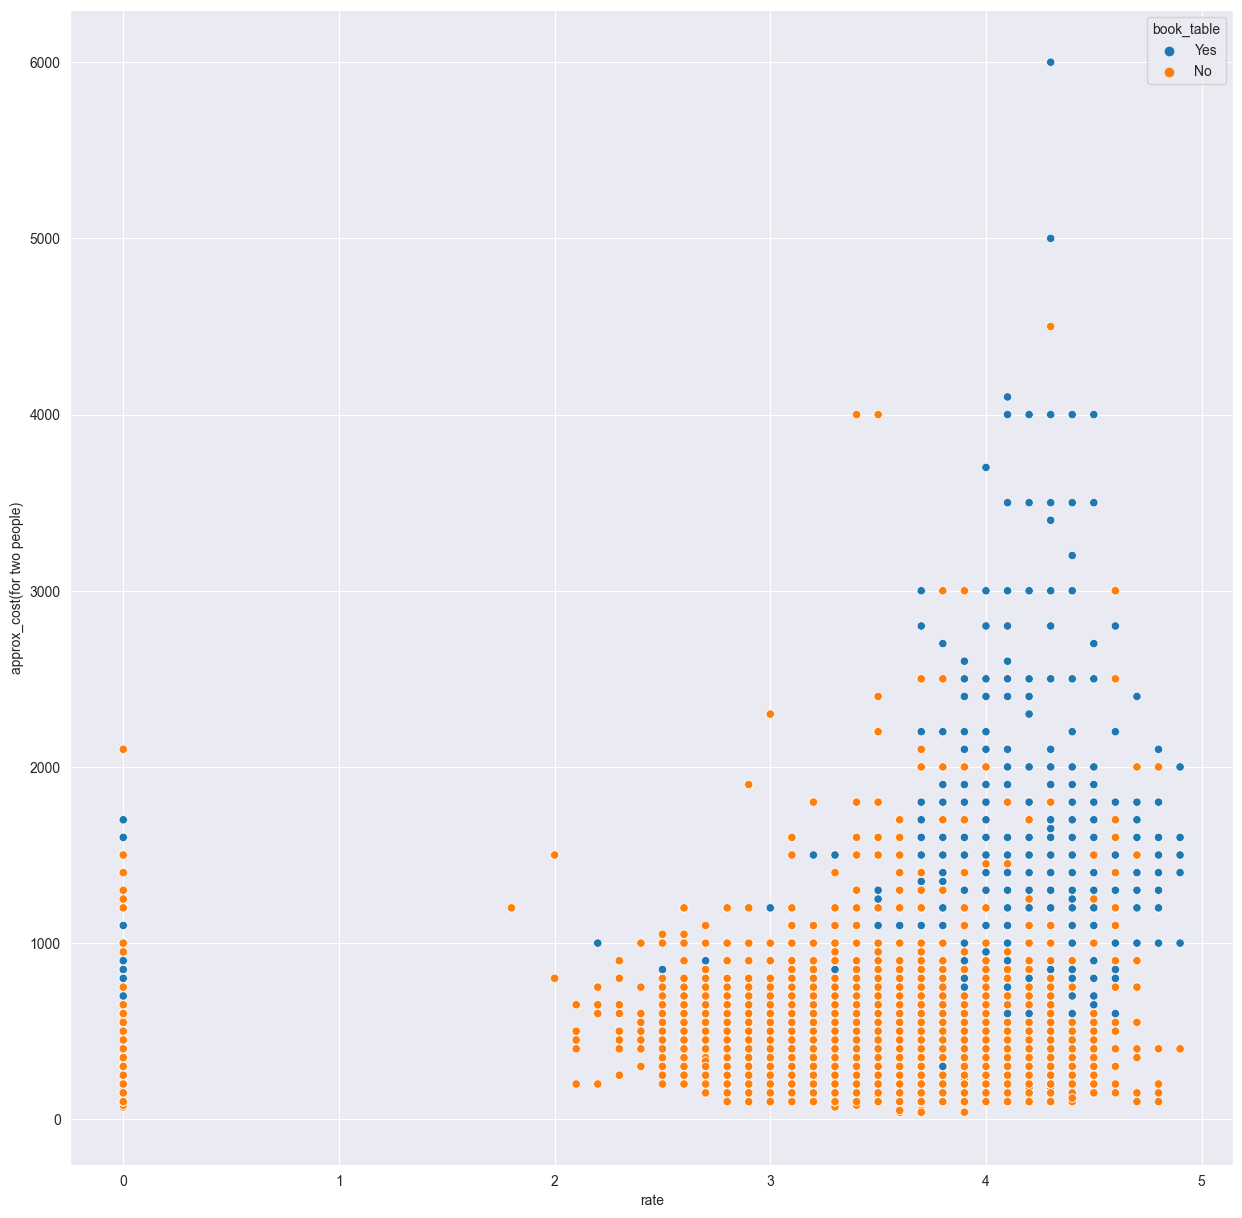

In [152]:
plt.figure(figsize=(15,15))
sns.scatterplot(y=full_data["approx_cost(for two people)"],x=full_data["rate"],hue=full_data["book_table"])
# fig.show()

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

D:\Freelance Work\Food Jupyter\food\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

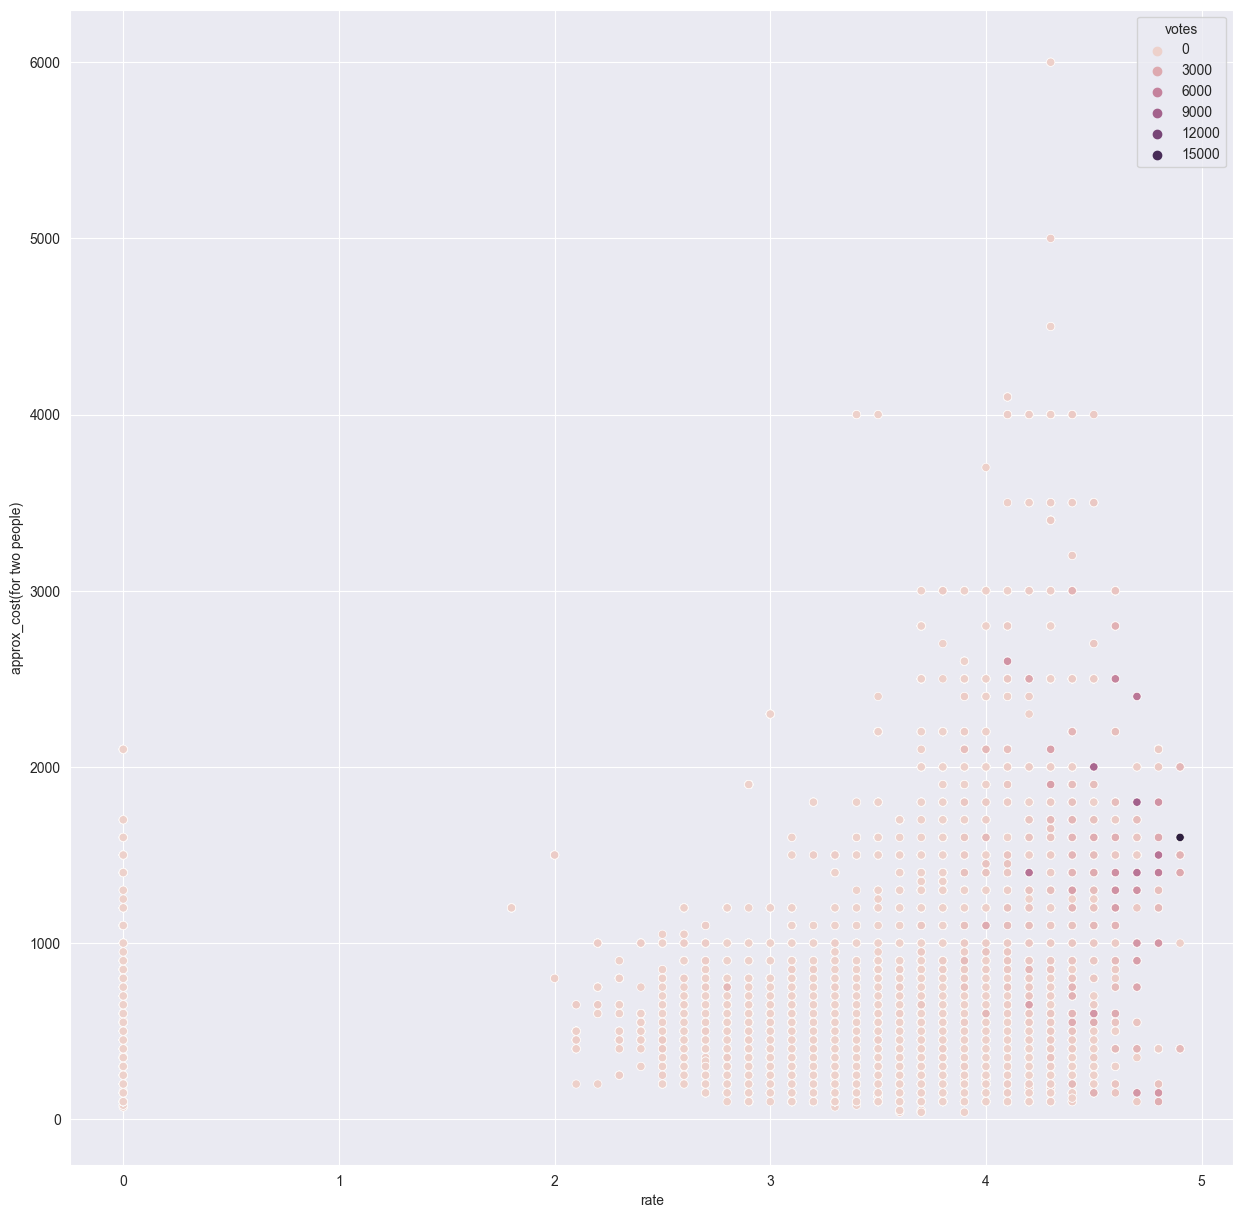

In [153]:
plt.figure(figsize=(15,15))
sns.scatterplot(y=full_data["approx_cost(for two people)"],x=full_data["rate"],hue=full_data["votes"])
# fig.show()

## GEOspatial analysis

### Get all cities we have in Dataframe

In [ ]:
#install geopy for get lan lat of all cities we have
#! pip install geopy

In [154]:
from geopy.geocoders import Nominatim

In [155]:
geolocation=Nominatim(user_agent="app")

In [156]:
#get ln and lat of cities
df_loct_res_lr

,0,1
0,BTM,581
1,Banashankari,238
2,Banaswadi,151
3,Bannerghatta Road,362
4,Basavanagudi,195
...,...,...
87,West Bangalore,3
88,Whitefield,634
89,Wilson Garden,40
90,Yelahanka,3


In [157]:
df_loct_res_lr.columns=["name","count of restaurant"]

In [ ]:
df_loct_res_lr.shape

In [158]:
lat_lon_=[]
for loction in df_loct_res_lr["name"]:
    lat_lon=geolocation.geocode(loction)
    if lat_lon is None:
#          pass 
        lat_lon_.append(np.nan)
    else:
        geo=(lat_lon.latitude,lat_lon.longitude)
        lat_lon_.append(geo)

In [159]:
print(lat_lon_)

[(45.95485055, -112.49659530324134), (15.8876779, 75.7046777), (13.0141618, 77.6518539), (12.9088191, 77.6003196), (12.9417261, 77.5755021), (12.9933829, 77.5389467), (12.93103185, 77.6782471), (12.9089453, 77.6239038), (44.621621, -84.790422), (33.5935063, -79.0345627), (17.2510682, 80.1651978), (12.9897994, 77.5717391), (40.4828868, -78.5514905), (39.76880625, -86.15345077251979), (51.5227907, -0.0775448), (50.9128101, -1.0035193), (12.9624669, 77.6381958), (12.8504319, 77.6601401), (12.945245, 77.6269144), (12.848759900000001, 77.64825295827616), (12.9986827, 77.615525), (13.0358698, 77.6323597), (29.1523467, 75.7245798), (13.0382184, 77.5919), (13.0258087, 77.6305067), (12.9392012, 77.6097061), (12.9768424, 77.7103746), (12.9732913, 77.6404672), (34.263019, -77.8935868), (12.2655944, 76.6465404), (16.3651178, 76.7808528), (27.3493013, 95.3159407), (12.9678074, 77.6568367), (13.007516, 77.695935), (12.9846713, 77.6790908), (19.1602288, 76.2772822), (13.0093455, 77.6377094), (12.9366

In [160]:
df_loct_res_lr["location"]=lat_lon_

In [161]:
df_loct_res_lr

,name,count of restaurant,location
0,BTM,581,"(45.95485055, -112.49659530324134)"
1,Banashankari,238,"(15.8876779, 75.7046777)"
2,Banaswadi,151,"(13.0141618, 77.6518539)"
3,Bannerghatta Road,362,"(12.9088191, 77.6003196)"
4,Basavanagudi,195,"(12.9417261, 77.5755021)"
...,...,...,...
87,West Bangalore,3,"(51.41300185, -1.3153145080163684)"
88,Whitefield,634,"(53.5533682, -2.2969019)"
89,Wilson Garden,40,"(12.9489339, 77.5968273)"
90,Yelahanka,3,"(13.1006982, 77.5963454)"


In [162]:
o=np.array(df_loct_res_lr["location"].astype(str))
o.tolist
type(o)

numpy.ndarray

In [ ]:
#unzip all long and lat
# def sep(x):
#     return x[0],x[1]
# df_loct_res_lr["lat"],df_loct_res_lr["lon"]=df_loct_res_lr["location"].apply(sep)

In [163]:
df_loct_res_lr["location"].isnull().sum()

1

In [164]:
lat=[]
lon=[]

for x in range(len(df_loct_res_lr["location"])):
#     print(x)
    try:
        if x is None:
            lat.append(np.nan)
            lon.append(np.nan)
        else:    
            lon.append(df_loct_res_lr["location"][x][1])
            lat.append(df_loct_res_lr["location"][x][0])
    except:
        pass

In [165]:
print(len(lat),len(lon))
df_loct_res_lr.dropna(inplace=True)

91 91


In [166]:
df_loct_res_lr["lat"],df_loct_res_lr["lon"]=lat,lon
df_loct_res_lr

,name,count of restaurant,location,lat,lon
0,BTM,581,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,238,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,151,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,362,"(12.9088191, 77.6003196)",12.908819,77.600320
4,Basavanagudi,195,"(12.9417261, 77.5755021)",12.941726,77.575502
...,...,...,...,...,...
87,West Bangalore,3,"(51.41300185, -1.3153145080163684)",51.413002,-1.315315
88,Whitefield,634,"(53.5533682, -2.2969019)",53.553368,-2.296902
89,Wilson Garden,40,"(12.9489339, 77.5968273)",12.948934,77.596827
90,Yelahanka,3,"(13.1006982, 77.5963454)",13.100698,77.596345


In [167]:
df_loct_res_lr[df_loct_res_lr.duplicated(subset=['count of restaurant', 'name', 'location', 'lat',"lon"],keep=False)]

,name,count of restaurant,location,lat,lon


In [168]:
df_loct_res_lr

,name,count of restaurant,location,lat,lon
0,BTM,581,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,238,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,151,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,362,"(12.9088191, 77.6003196)",12.908819,77.600320
4,Basavanagudi,195,"(12.9417261, 77.5755021)",12.941726,77.575502
...,...,...,...,...,...
87,West Bangalore,3,"(51.41300185, -1.3153145080163684)",51.413002,-1.315315
88,Whitefield,634,"(53.5533682, -2.2969019)",53.553368,-2.296902
89,Wilson Garden,40,"(12.9489339, 77.5968273)",12.948934,77.596827
90,Yelahanka,3,"(13.1006982, 77.5963454)",13.100698,77.596345


In [169]:
#to plot map 
! pip install folium

     ------------------------------------ 102.3/102.3 kB 590.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [172]:
import folium
from folium.plugins import HeatMap

In [173]:
#first generate base map of city
def generatebasemap(defualt_loc=[12.97,77.59],defualt_zoom=12):
    basemap=folium.Map(location=defualt_loc,zoom_start=defualt_zoom)
    return basemap

In [174]:
basemap=generatebasemap()
basemap

In [175]:
#plot our heatmap
HeatMap(df_loct_res_lr[["lat","lon","count of restaurant"]].values.tolist(),zoom=20,radius=15).add_to(basemap)

In [176]:
basemap

In [177]:
full_data["cuisines"].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [178]:
df_north=full_data[full_data["cuisines"]=="North Indian"]

In [179]:
df_north.isnull().sum()

url                               0
address                           0
name                              0
online_order                      0
book_table                        0
rate                              0
votes                             0
phone                            89
location                          0
rest_type                        10
dish_liked                     1113
cuisines                          0
approx_cost(for two people)      40
reviews_list                      0
menu_item                         0
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [180]:
df_north=df_north.groupby("location",as_index=False)["url"].count()

In [181]:
df_north

,location,url
0,BTM,274
1,Banashankari,35
2,Banaswadi,9
3,Bannerghatta Road,60
4,Basavanagudi,17
...,...,...
59,"Varthur Main Road, Whitefield",3
60,Vasanth Nagar,12
61,Whitefield,148
62,Wilson Garden,37


In [182]:
lat_lon_=[]
for loction in df_north["location"]:
    lat_lon=geolocation.geocode(loction)
    if lat_lon is None:
#          pass 
        lat_lon_.append(np.nan)
    else:
        geo=(lat_lon.latitude,lat_lon.longitude)
        lat_lon_.append(geo)

In [183]:
df_north["geo"]=lat_lon_

In [184]:
lat_lon_

[(45.95485055, -112.49659530324134),
 (15.8876779, 75.7046777),
 (13.0141618, 77.6518539),
 (12.9088191, 77.6003196),
 (12.9417261, 77.5755021),
 (12.9933829, 77.5389467),
 (12.93103185, 77.6782471),
 (12.9089453, 77.6239038),
 (44.621621, -84.790422),
 (33.5935063, -79.0345627),
 (17.2510682, 80.1651978),
 (40.4828868, -78.5514905),
 (51.5227907, -0.0775448),
 (12.9624669, 77.6381958),
 (12.8504319, 77.6601401),
 (12.945245, 77.6269144),
 (12.848759900000001, 77.64825295827616),
 (12.9986827, 77.615525),
 (13.0358698, 77.6323597),
 (29.1523467, 75.7245798),
 (13.0258087, 77.6305067),
 (12.9392012, 77.6097061),
 (12.9768424, 77.7103746),
 (12.9732913, 77.6404672),
 (12.2655944, 76.6465404),
 (27.3493013, 95.3159407),
 (12.9678074, 77.6568367),
 (12.9846713, 77.6790908),
 (19.1602288, 76.2772822),
 (13.0093455, 77.6377094),
 (12.9277245, 77.6327822),
 (12.9282918, 77.6254034),
 (12.9327778, 77.6294052),
 (12.9348429, 77.6189768),
 (12.9390255, 77.6238477),
 (12.9364846, 77.6134783),
 (1

In [185]:
lat,lon=zip(*np.array(df_north["geo"].values))

In [186]:
df_north["lat"],df_north["lon"]=lat,lon

In [187]:
df_north

,location,url,geo,lat,lon
0,BTM,274,"(45.95485055, -112.49659530324134)",45.954851,-112.496595
1,Banashankari,35,"(15.8876779, 75.7046777)",15.887678,75.704678
2,Banaswadi,9,"(13.0141618, 77.6518539)",13.014162,77.651854
3,Bannerghatta Road,60,"(12.9088191, 77.6003196)",12.908819,77.600320
4,Basavanagudi,17,"(12.9417261, 77.5755021)",12.941726,77.575502
...,...,...,...,...,...
59,"Varthur Main Road, Whitefield",3,"(12.9413238, 77.7471103)",12.941324,77.747110
60,Vasanth Nagar,12,"(17.4938648, 78.3862078)",17.493865,78.386208
61,Whitefield,148,"(53.5533682, -2.2969019)",53.553368,-2.296902
62,Wilson Garden,37,"(12.9489339, 77.5968273)",12.948934,77.596827


In [188]:
basemap=generatebasemap()
HeatMap(df_north[["lat","lon"]],zoom=12,radius=15).add_to(basemap)

In [189]:
basemap

In [190]:
#entire analysis of our data
full_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [191]:
df_entire=full_data.groupby(['rest_type','name']).count()

In [192]:
df_entire

url  address  online_order  \
rest_type          name                                                      
Bakery             7th Heaven                     2        2             2   
                   A Little For Love              1        1             1   
                   Adarsh Bakery                  2        2             2   
                   Adi's Cake N Cafe              2        2             2   
                   Albert Bakery                  1        1             1   
...                                             ...      ...           ...   
Takeaway, Delivery Yumlane                        3        3             3   
                   Yumme Veg                      2        2             2   
                   Zamorin's Mappillah Biryani    1        1             1   
                   Zu's Doner Kebaps              1        1             1   
                   eat.fit                        2        2             2   

                                                book_table  rate  votes  \
rest_type          name                                                   
Bakery             7th Heaven                            2     2      2   
                   A Little For Love                     1     1      1   
                   Adarsh Bakery                         2     2      2   
                   Adi's Cake N Cafe                     2     2      2   
                   Albert Bakery                         1     1      1   
...                                                    ...   ...    ...   
Takeaway, Delivery Yumlane                               3     3      3   
                   Yumme Veg                             2     2      2   
                   Zamorin's Mappillah Biryani           1     1      1   
                   Zu's Doner Kebaps                     1     1      1   
                   eat.fit                               2     2      2   

                                                phone  location  dish_liked  \
rest_type          name                                                       
Bakery             7th Heaven                       2         2           0   
                   A Little For Love                1         1           0   
                   Adarsh Bakery                    2         2           0   
                   Adi's Cake N Cafe                2         2           0   
                   Albert Bakery                    1         1           1   
...                                               ...       ...         ...   
Takeaway, Delivery Yumlane                          2         3           0   
                   Yumme Veg                        2         2           0   
                   Zamorin's Mappillah Biryani      1         1           0   
                   Zu's Doner Kebaps                0         1           0   
                   eat.fit                          2         2           0   

                                                cuisines  \
rest_type          name                                    
Bakery             7th Heaven                          2   
                   A Little For Love                   1   
                   Adarsh Bakery                       2   
                   Adi's Cake N Cafe                   2   
                   Albert Bakery                       1   
...                                                  ...   
Takeaway, Delivery Yumlane                             3   
                   Yumme Veg                           2   
                   Zamorin's Mappillah Biryani         1   
                   Zu's Doner Kebaps                   1   
                   eat.fit                             2   

                                                approx_cost(for two people)  \
rest_type          name                                                       
Bakery             7th Heaven                                             2   
           

In [193]:
df_entire.sort_values(["url"],ascending=False)


url  address  \
rest_type           name                                                 
Cafe                Cafe Coffee Day                        89       89   
Casual Dining, Cafe Onesta                                 85       85   
Quick Bites         Five Star Chicken                      67       67   
                    Domino's Pizza                         60       60   
                    McDonald's                             59       59   
...                                                       ...      ...   
Casual Dining       Patels Inn                              1        1   
Quick Bites         Desi Chats                              1        1   
Dessert Parlor      Lot Like Crepes                         1        1   
                    Luna Sweets                             1        1   
Quick Bites         Sri Raghavendra Prasanna Coffee Club    1        1   

                                                          online_order  \
rest_type           name                                                 
Cafe                Cafe Coffee Day                                 89   
Casual Dining, Cafe Onesta                                          85   
Quick Bites         Five Star Chicken                               67   
                    Domino's Pizza                                  60   
                    McDonald's                                      59   
...                                                                ...   
Casual Dining       Patels Inn                                       1   
Quick Bites         Desi Chats                                       1   
Dessert Parlor      Lot Like Crepes                                  1   
                    Luna Sweets                                      1   
Quick Bites         Sri Raghavendra Prasanna Coffee Club             1   

                                                          book_table  rate  \
rest_type           name                                                     
Cafe                Cafe Coffee Day                               89    89   
Casual Dining, Cafe Onesta                                        85    85   
Quick Bites         Five Star Chicken                             67    67   
                    Domino's Pizza                                60    60   
                    McDonald's                                    59    59   
...                                                              ...   ...   
Casual Dining       Patels Inn                                     1     1   
Quick Bites         Desi Chats                                     1     1   
Dessert Parlor      Lot Like Crepes                                1     1   
                    Luna Sweets                                    1     1   
Quick Bites         Sri Raghavendra Prasanna Coffee Club           1     1   

                                                          votes  phone  \
rest_type           name                                                 
Cafe                Cafe Coffee Day                          89     86   
Casual Dining, Cafe Onesta                                   85     85   
Quick Bites         Five Star Chicken                        67     62   
                    Domino's Pizza                           60     60   
                    McDonald's                               59     59   
...                                                         ...    ...   
Casual Dining       Patels Inn                                1      1   
Quick Bites         Desi Chats                                1      1   
Dessert Parlor      Lot Like Crepes                           1      1   
                    Luna Sweets                               1      1   
Quick Bites         Sri Raghavendra Prasanna Coffee Club      1      1   

                                                          location  \
rest_type           name                                             
Cafe          

In [194]:
df_entire.sort_values(["url"],ascending=False).groupby('rest_type',as_index=False).apply(lambda x:x.sort_values("url",ascending=False))

url  address  online_order  \
   rest_type          name                                                     
0  Bakery             Just Bake                    44       44            44   
                      Warm Oven                    28       28            28   
                      INDULGE by InnerChef         28       28            28   
                      Karachi Bakery               26       26            26   
                      CakeZone                     21       21            21   
...                                               ...      ...           ...   
86 Takeaway, Delivery Agraharam Meal                1        1             1   
                      Adyar Ananda Bhavan Sweets    1        1             1   
                      Faasos                        1        1             1   
                      Abhiruchi Restaurant          1        1             1   
                      Lucky Singh & Co              1        1             1   

                                                  book_table  rate  votes  \
   rest_type          name                                                  
0  Bakery             Just Bake                           44    44     44   
                      Warm Oven                           28    28     28   
                      INDULGE by InnerChef                28    28     28   
                      Karachi Bakery                      26    26     26   
                      CakeZone                            21    21     21   
...                                                      ...   ...    ...   
86 Takeaway, Delivery Agraharam Meal                       1     1      1   
                      Adyar Ananda Bhavan Sweets           1     1      1   
                      Faasos                               1     1      1   
                      Abhiruchi Restaurant                 1     1      1   
                      Lucky Singh & Co                     1     1      1   

                                                  phone  location  dish_liked  \
   rest_type          name                                                      
0  Bakery             Just Bake                      44        44          14   
                      Warm Oven                      28        28           7   
                      INDULGE by InnerChef           28        28           0   
                      Karachi Bakery                 24        26           3   
                      CakeZone                       21        21          10   
...                                                 ...       ...         ...   
86 Takeaway, Delivery Agraharam Meal                  1         1           1   
                      Adyar Ananda Bhavan Sweets      1         1           0   
                      Faasos                          1         1           1   
                      Abhiruchi Restaurant            1         1           0   
                      Lucky Singh & Co                1         1           1   

                                                  cuisines  \
   rest_type          name                                   
0  Bakery             Just Bake                         44   
                      Warm Oven                         28   
                      INDULGE by InnerChef              28   
                      Karachi Bakery                    26   
                      CakeZone                          21   
...                                                    ...   
86 Takeaway, Delivery Agraharam Meal                     1   
                      Adyar Ananda Bhavan Sweets         1   
                      Faasos                             1   
                      Abhiruchi Restaurant               1   
                      Lucky Singh & Co                   1   

                                                  approx_cost(for two people)  \
   rest_type          name                                       

In [195]:
dataentire=df_entire.sort_values(["url"],ascending=False).groupby('rest_type',as_index=False).apply(lambda x:x.sort_values("url",ascending=False))

In [196]:
dataset=dataentire["url"].reset_index().rename(columns={"url":"count"})

In [197]:
dataset

,level_0,rest_type,name,count
0,0,Bakery,Just Bake,44
1,0,Bakery,Warm Oven,28
2,0,Bakery,INDULGE by InnerChef,28
3,0,Bakery,Karachi Bakery,26
4,0,Bakery,CakeZone,21
...,...,...,...,...
7735,86,"Takeaway, Delivery",Agraharam Meal,1
7736,86,"Takeaway, Delivery",Adyar Ananda Bhavan Sweets,1
7737,86,"Takeaway, Delivery",Faasos,1
7738,86,"Takeaway, Delivery",Abhiruchi Restaurant,1


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86],
 [Text(0, 0, 'Bakery'),
  Text(1, 0, 'Bakery, Beverage Shop'),
  Text(2, 0, 'Bakery, Cafe'),
  Text(3, 0, 'Bakery, Dessert Parlor'),
  Text(4, 0, 'Bakery, Food Court'),
  Text(5, 0, 'Bakery, Quick Bites'),
  Text(6, 0, 'Bar'),
  Text(7, 0, 'Bar, Casual Dining'),
  Text(8, 0, 'Bar, Lounge'),
  Text(9, 0, 'Bar, Pub'),
  Text(10, 0, 'Bar, Quick Bites'),
  Text(11, 0, 'Beverage Shop'),
  Text(12, 0, 'Beverage Shop, Cafe'),
  Text(13, 0, 'Beverage Shop, Dessert Parlor'),
  Text(14, 0, 'B

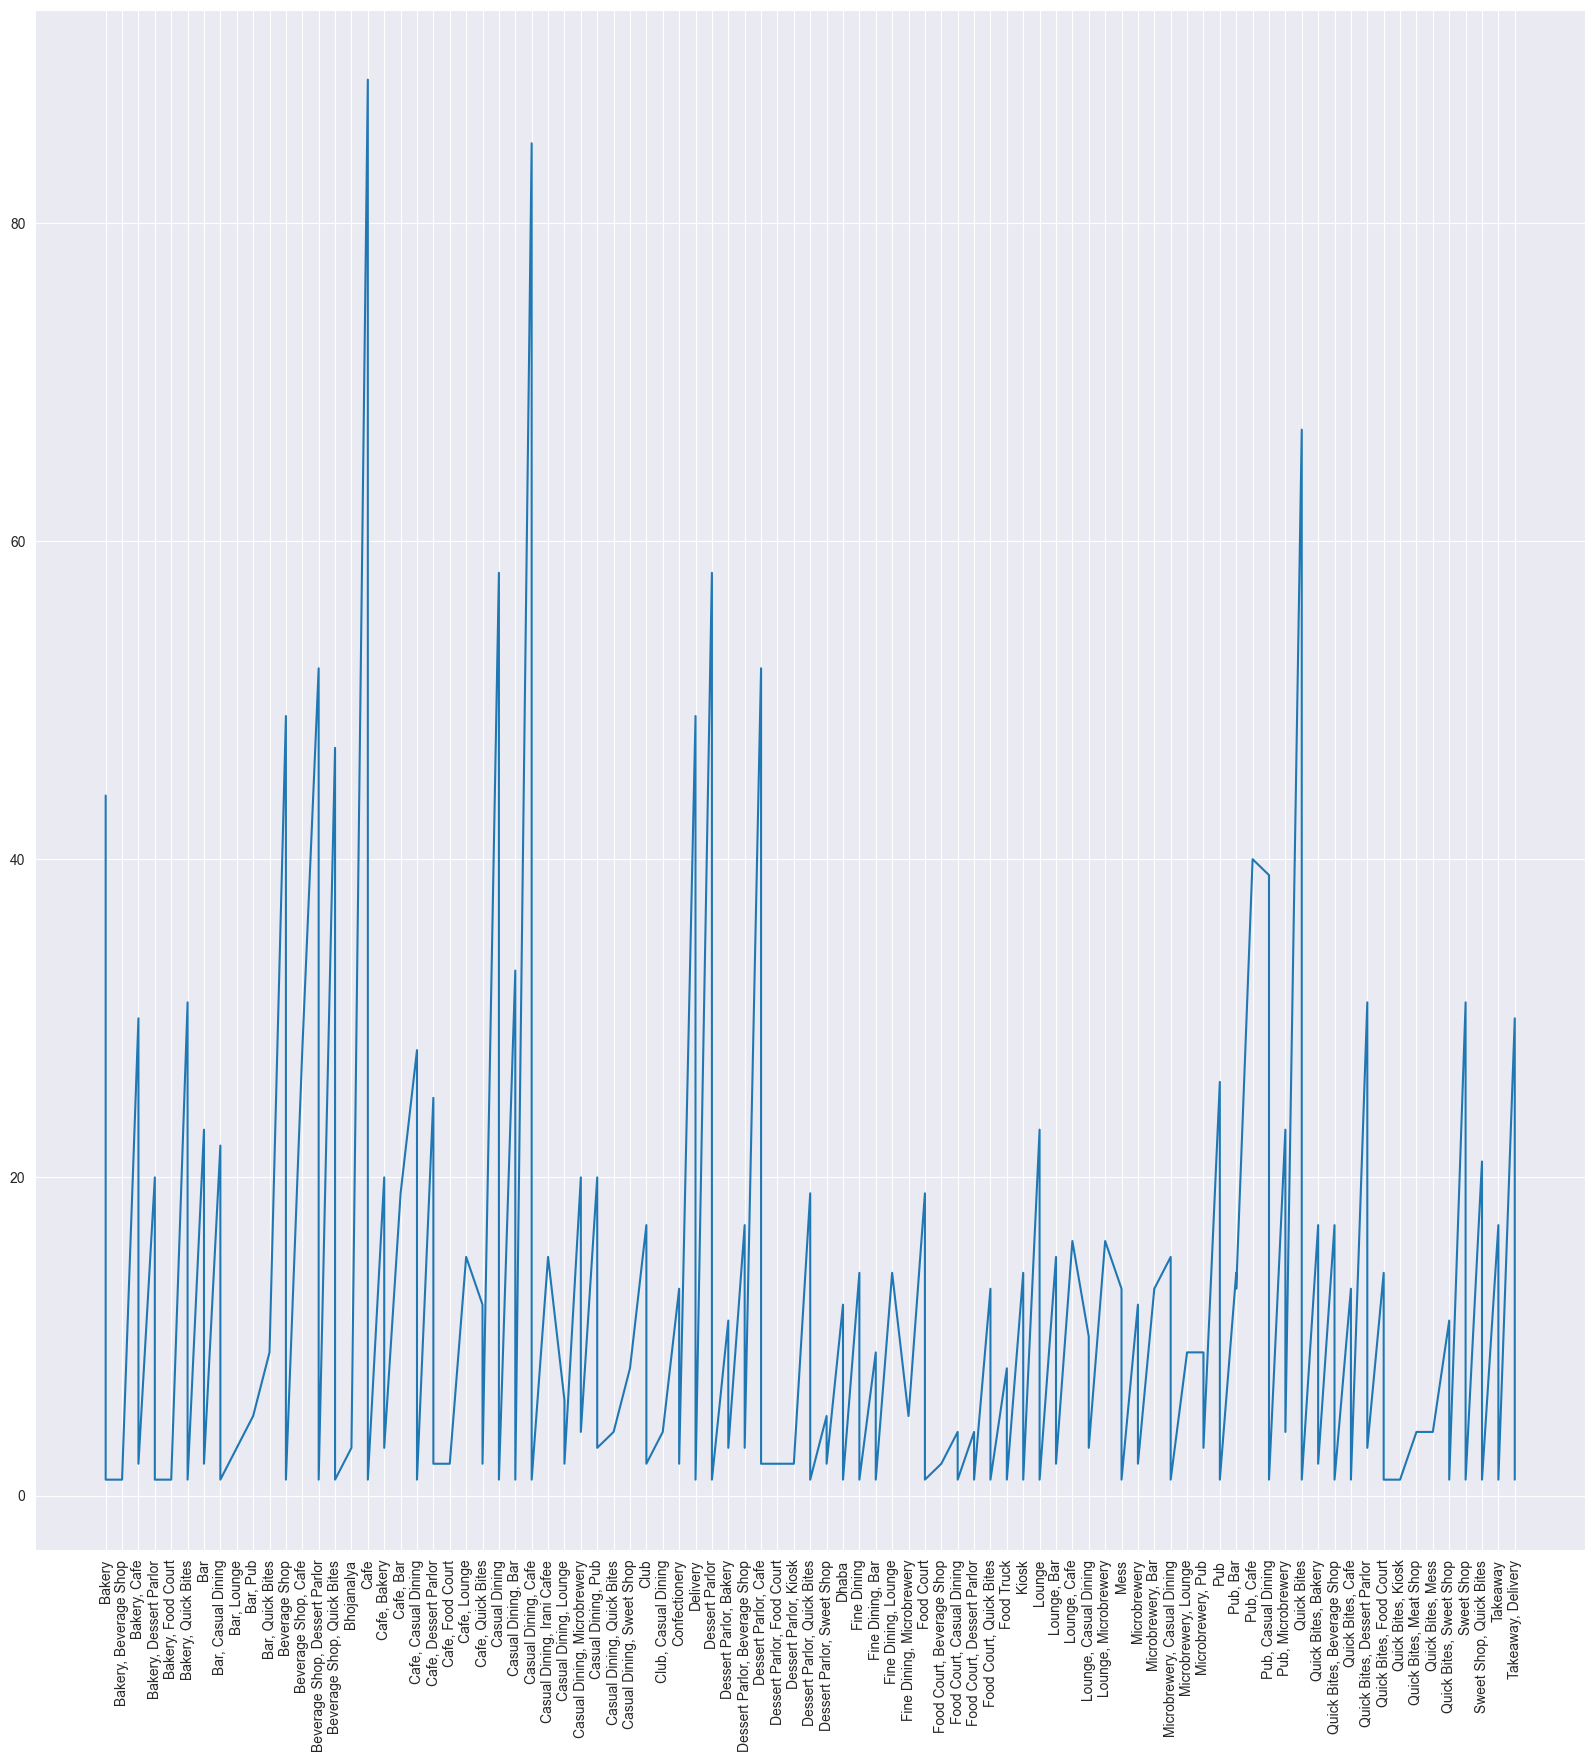

In [198]:
# datasetp=dataset[:10]
plt.figure(figsize=(20,20))
plt.plot(dataset["rest_type"],dataset["count"])
plt.xticks(rotation=90)

In [199]:
#rest_tyoe count
px.line(data_frame=dataset,x="rest_type",y="count").show()